# Sample Mean vs. Mode vs. Expected Value

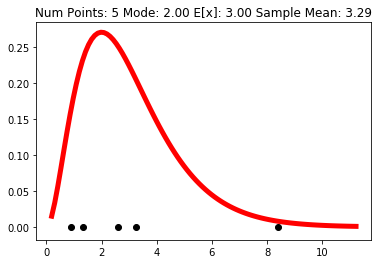

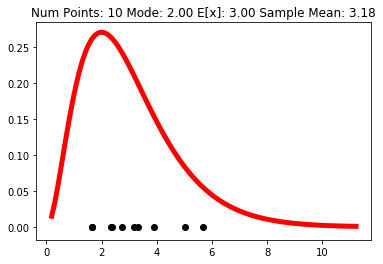

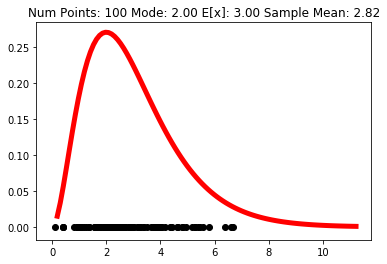

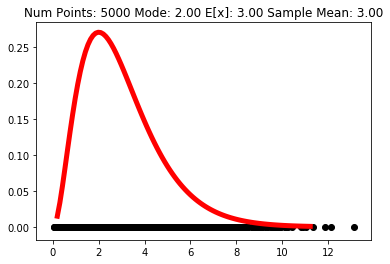

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import multivariate_normal
import textwrap
import math
%matplotlib inline  

def sampleMeanEx():
	'''sampleMeanEx()'''
	nSamples = (5, 10, 100, 5000)
	a = 3
	b = 1
	for i in range(len(nSamples)):
		fig = plt.figure()
		ax = fig.add_subplot(*[1,1,1])
		draws = np.random.gamma(shape=a,scale=b,size=nSamples[i])
		mode = (a-1)*b
		expectedv = a*b
		samplemean = sum(draws)/len(draws)
		x = np.linspace(gamma.ppf(0.001, a, scale=b), gamma.ppf(0.999, a, scale=b), 100)
		ax.plot(x, gamma.pdf(x, a, scale=b), 'r-', lw=5)
		ax.scatter(draws, np.zeros(len(draws)), c='k')
		myTitle = 'Num Points: ' + str(nSamples[i]) + ' Mode: ' + str("%.2f"%mode) + ' E[x]: ' + str("%.2f"%expectedv) + ' Sample Mean: ' + str("%.2f"%samplemean)
		ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))
		plt.show()

sampleMeanEx()

# Conjugate Priors

* Last class we mentioned the concept of *conjugate priors*
* Two distributions have a conjugate prior relationship when the form of the posterior is the same as the form of the prior. 
* For example, a Gaussian distribution is a conjugate prior for the mean of a Gaussian as shown in the following: 

\begin{eqnarray}
p(\mu |\mathbf{X}) &\propto& p(\mathbf{X}|\mu)p(\mu)\\
&=& \prod_{i=1}^N\mathscr{N}(x_i|\mu, \sigma^2)\mathscr{N}(\mu|\mu_0, \sigma_0^2)\\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{1}{2}\frac{(x_i - \mu)^2}{\sigma^2} \right\}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left\{-\frac{1}{2}\frac{(\mu - \mu_0)^2}{\sigma_0^2} \right\}\\
&=&  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}} \exp\left\{ \sum_{i=1}^N \left(-\frac{1}{2}\frac{(x_i - \mu)^2}{\sigma^2}\right) -\frac{1}{2}\frac{(\mu - \mu_0)^2}{\sigma_0^2} \right\}\\
&=&  \frac{1}{\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma_0^2}} \exp\left\{  -\frac{1}{2}\left( \sum_{i=1}^N\frac{(x_i - \mu)^2}{\sigma^2} + \frac{(\mu - \mu_0)^2}{\sigma_0^2} \right) \right\}\\
&=&  \frac{1}{\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma_0^2}} \exp\left\{  -\frac{1}{2}\left( \frac{\sum_{i=1}^Nx_i^2 - 2\sum_{i=1}^Nx_i\mu + \mu^2N}{\sigma^2} + \frac{\mu^2 - 2\mu\mu_0 + \mu_0^2}{\sigma_0^2} \right) \right\}\\
&=&  \frac{1}{\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma_0^2}} \exp\left\{  -\frac{1}{2}\left( \mu^2\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right) - 2\mu\left( \frac{\sum_{i=1}^Nx_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}  \right) +  \frac{\sum_{i=1}^Nx_i^2 }{\sigma^2} + \frac{ \mu_0^2}{\sigma_0^2} \right) \right\}\\
&=& \frac{1}{\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma_0^2}} \exp\left\{  -\frac{1}{2}\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)\left( \mu^2 - 2\mu\left( \frac{\sum_{i=1}^Nx_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}  \right)\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)^{-1} \right) \right\}\\
& & \exp\left\{ \frac{\sum_{i=1}^Nx_i^2 }{\sigma^2} + \frac{ \mu_0^2}{\sigma_0^2}  \right\} \nonumber\\
&=& \frac{1}{\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma_0^2}} \exp\left\{  -\frac{1}{2}\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)\left( \mu - \left( \frac{\sum_{i=1}^Nx_i\sigma_0^2 + \mu_0\sigma^2}{\sigma^2\sigma_0^2} \right)\left( \frac{N\sigma_0^2 + \sigma^2}{\sigma^2\sigma_0^2}\right)^{-1}  \right)^2 \right.\\
&+& \left. \frac{1}{2}\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)
\left(
\left( \frac{\sum_{i=1}^Nx_i\sigma_0^2 + \mu_0\sigma^2}{\sigma^2\sigma_0^2} \right)\left( \frac{N\sigma_0^2 + \sigma^2}{\sigma^2\sigma_0^2}\right)^{-1} \right)^2  \right\} 
\exp\left\{ \frac{\sum_{i=1}^Nx_i^2 }{\sigma^2} + \frac{ \mu_0^2}{\sigma_0^2}  \right\} \nonumber\\
%
&=& \frac{1}{\sqrt{2\pi\sigma^2}\sqrt{2\pi\sigma_0^2}} \exp\left\{  -\frac{1}{2}\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)\left( \mu -  \frac{\sum_{i=1}^Nx_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2 + \sigma^2  }  \right)^2  \right\} \\
& &\exp\left\{  \frac{1}{2}\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)
\left(\frac{\sum_{i=1}^Nx_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2 + \sigma^2  }\right)^2 + \frac{\sum_{i=1}^Nx_i^2 }{\sigma^2} + \frac{ \mu_0^2}{\sigma_0^2}  \right\} \nonumber\\
%
&=& C \exp\left\{  -\frac{1}{2}\left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)\left( \mu -  \frac{\sum_{i=1}^Nx_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2 + \sigma^2  }  \right)^2  \right\} \\
&\propto& \mathscr{N}\left(\mu\left|\frac{\sum_{i=1}^N x_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2 + \sigma^2  }, \left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}\right)^{-1}\right.\right)
\end{eqnarray}

* So, as shown above, the form of the posterior is also a Gaussian distribution.  

* There are many conjugate prior relationships, e.g., Bernoulli-Beta, Gaussian-Gaussian, Gaussian-Inverse Wishart, Multinomial-Dirichlet


# Bayesian Regression

* Look back our polynomial regression: 
\begin{equation}
\min E^{\ast}(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N\left( y(x_n, \mathbf{w}) - t_n \right)^2 + \frac{\lambda}{2}\left\| \mathbf{w} \right\|_2^2
\end{equation}
This is equivalent to: 
\begin{equation}
\max \prod_{n=1}^N \exp\left\{-\frac{1}{2}\left( y(x_n, \mathbf{w}) - t_n \right)^2 \right\}\exp\left\{- \frac{\lambda}{2}\left\| \mathbf{w} \right\|_2^2 \right\}
\end{equation}
* As discussed, the first term is the likelihood and the second term is the prior on the weights
*  These are Gaussian distributions:
\begin{equation}
\mathscr{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left\{ -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} \right\}
\end{equation}
* $\sigma^2$ is the variance OR $\frac{1}{\sigma^2}$ is the *precision*
* So, as $\lambda$ gets big, variance gets smaller/tighter.  As $\lambda$ gets small, variance gets larger/wider. 


* Previously, we used: 
\begin{equation}
y = \sum_{j=0}^M w_j x^j
\end{equation}
*  We can extend this, to make it more general and flexible: 
\begin{equation}
y = \sum_{j=0}^M w_j \phi_j(\mathbf{x})
\end{equation}
where $\phi_j(\mathbf{x})$ is a *basis function*
* For example:
    * Basis function we were using previously: $\phi_j(x) = x^j$ (for univariate $x$)
    * Linear Basis Function: $\phi_j(\mathbf{x}) = x_j$
    * Radial Basis Function: $\phi_j(\mathbf{x}) = \exp\left\{ - \frac{(x - \mu_j)^2}{2s_j^2}\right\}$
    * Sigmoidal Basis Function: $\phi_j(\mathbf{x}) = \frac{1}{1 + \exp \left\{ \frac{\mathbf{x} - \mu_j}{s}\right\}}$

* As before:
\begin{equation}
t = y(\mathbf{x},\mathbf{w}) + \epsilon
\end{equation}
* However, now: 
\begin{equation}
y = \mathbf{w}^T\boldsymbol{\Phi}(\mathbf{x}) = [w_0, w_1, \ldots, w_M][\phi_0(\mathbf{x}), \phi_1(\mathbf{x}), \ldots, \phi_M(\mathbf{x})]^T
\end{equation}
where $\epsilon \sim \mathscr{N}(\cdot|0, \beta^{-1})$


\begin{equation}
p(t | \mathbf{w}, \beta) = \prod_{n=1}^N \mathscr{N}(t_n | \mathbf{w}^T\boldsymbol{\Phi}(\mathbf{x}_n), \beta^{-1})
\end{equation}
* So, what is the ''trick'' to use to maximize this? 
\begin{eqnarray}
\mathscr{L} = \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) - \frac{1}{2}\beta E(\mathbf{w})\\
\frac{\partial \mathscr{L}}{\partial \mathbf{w}} = \beta \sum_{n=1}^N(t_n - \mathbf{w}^T\boldsymbol{\Phi}(\mathbf{x}_n))\boldsymbol{\Phi}(\mathbf{x}_n)^T = 0 
\end{eqnarray}
* This results in:
\begin{equation}
\mathbf{w}_{ML} = \left(\boldsymbol{\Phi}^T\boldsymbol{\Phi} \right)^{-1}\boldsymbol{\Phi}^T\mathbf{t}
\end{equation}
where 
\begin{equation}
\boldsymbol{\Phi} = \left[ \boldsymbol{\Phi}(x_1), \boldsymbol{\Phi}(x_2), ...\right]
\end{equation}


* What would you do if you want to include a prior? get the MAP solution?  If assuming zero-mean Gaussian noise, then Regularized Least Squares!

### Bayesian Linear Regression

* Recall: $E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$ where $\lambda$ is the trade-off regularization parameter
* A simple regularizer (and the one we used previously) is: $E_W(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w}$
* If we assume zero-mean Gaussian noise: $E_D(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N \left\{ t_n - \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_n) \right\}^2$
* Then, the total error becomes: $\frac{1}{2}\sum_{n=1}^N \left\{ t_n - \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_n) \right\}^2 +  \frac{\lambda}{2}\mathbf{w}^T\mathbf{w}$
* We can take the derivative, set it equal to zero and solve for the weights.  When we do, we get:
\begin{equation}
\mathbf{w} = \left( \lambda \mathbf{I} + \boldsymbol{\Phi}^T\boldsymbol{\Phi}\right)^{-1}\boldsymbol{\Phi}^T\mathbf{t}
\end{equation}
* Recall, we can interpret this as:
\begin{eqnarray}
\min_{\mathbf{w}} E^{\ast} &=& \min_{\mathbf{w}}\left\{ E_D(\mathbf{w}) + \lambda E_W(\mathbf{w}) \right\}\\
 &=& \max_{\mathbf{w}}\left\{ -E_D(\mathbf{w}) - \lambda E_W(\mathbf{w}) \right\}\\
 &=& \max_{\mathbf{w}}\exp\left\{ -E_D(\mathbf{w}) - \lambda E_W(\mathbf{w}) \right\}\\
 &=& \max_{\mathbf{w}}\exp\left\{ -E_D(\mathbf{w})\right\} \exp\left\{- \lambda E_W(\mathbf{w}) \right\}\\
 &\propto& \max_{\mathbf{w}} \prod_{n=1}^N \mathscr{N}\left(t\left|\mathbf{w}^T\mathbf{\Phi}(\mathbf{x}_n),  \beta^{-1}\mathbf{I}\right.\right) \mathscr{N}\left(\mathbf{w}\left|\mathbf{m}_0, \mathbf{S}_0\right.\right)\\
 &=& \max_{\mathbf{w}} p\left(\mathbf{t}\left|\mathbf{w}, \mathbf{X}\right.\right)p\left(\mathbf{w}\right)\\
 &\propto& \max_{\mathbf{w}} p(\mathbf{w}|\mathbf{m}_N, \mathbf{S}_N)= \mathscr{N}(\mathbf{w}|\mathbf{m}_N, \mathbf{S}_N)
\end{eqnarray}
where $\mathbf{m}_N = \mathbf{S}_N\left(\mathbf{S}_0\mathbf{m}_0 + \beta\boldsymbol{\Phi}^T\mathbf{t} \right)$ and $\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \beta\boldsymbol{\Phi}^T\boldsymbol{\Phi}$

* What happens with different values of $\beta$ and $\mathbf{S}_0$? 


* To simplify, let us assume that $\mathbf{S}_0 = \alpha^{-1}\mathbf{I}$ and $\mathbf{m}_0 = \mathbf{0}$, thus, $\mathbf{m}_N = \beta\mathbf{S}_N\boldsymbol{\Phi}^T\mathbf{t}$ and $\mathbf{S}_N^{-1} = (\alpha^{-1}\mathbf{I})^{-1} + \beta\boldsymbol{\Phi}^T\boldsymbol{\Phi} =  \alpha\mathbf{I} + \beta\boldsymbol{\Phi}^T\boldsymbol{\Phi}$
* This results in the following Log Posterior: 
\begin{eqnarray}
\ln p(\mathbf{w}|\mathbf{t}) = - \frac{\beta}{2}\sum_{n=1}^N\left( t_n - \mathbf{w}^T\mathbf{\Phi}(\mathbf{x}_n)\right)^2 - \frac{\alpha}{2}\mathbf{w}^T\mathbf{w} + const
\end{eqnarray}

* Let us suppose we are dealing with 1-D data, $\mathbf{X} = \left\{ x_1, \ldots, x_N \right\}$ and a linear form for y: $y(x, \mathbf{w}) = w_0 + w_1x$

* We are going to generate synthetic data from: $t = -0.3 + 0.5x + \epsilon$ where $\epsilon$ is from zero-mean Gaussian noise. The goal is to estimate the true values $w_0 = -0.3$ and $w_1 = 0.5$.  



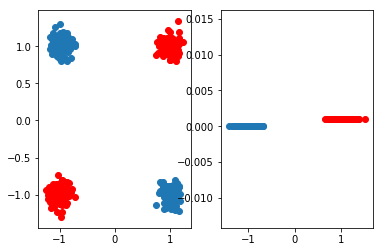

In [2]:
def innerBasisFunc(dataX):
	return np.vstack([dataX[i,:]@dataX[i,:].T for i in range(dataX.shape[0])])

def prodBasisFunc(dataX):
	return np.vstack([dataX[i,0]*dataX[i,1] for i in range(dataX.shape[0])])

def xorExample():
	'''xorExample()'''
	class1X = np.vstack([np.array([-1,-1])+np.random.normal(0,.1,2 ) for i in range(100)])
	class1X = np.vstack((class1X,np.vstack([np.array([1,1])+np.random.normal(0,.1,2 ) for i in range(100)])))
	class2X = np.vstack([np.array([1,-1])+np.random.normal(0,.1,2 ) for i in range(100)])
	class2X = np.vstack((class2X,np.vstack([np.array([-1,1])+np.random.normal(0,.1,2 ) for i in range(100)])))
	phi1X = prodBasisFunc(class1X)
	phi2X = prodBasisFunc(class2X)
    
	fig = plt.figure()
	ax = fig.add_subplot(*[1,2,1])
	ax.scatter(class1X[:,0], class1X[:,1], c='r') 
	ax.scatter(class2X[:,0], class2X[:,1]) 
	ax = fig.add_subplot(*[1,2,2])
	ax.scatter(phi1X, np.zeros(phi1X.shape)+0.001, c='r') 
	ax.scatter(phi2X, np.zeros(phi2X.shape)) 
	plt.show()
    
xorExample()

/Users/alinazare/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


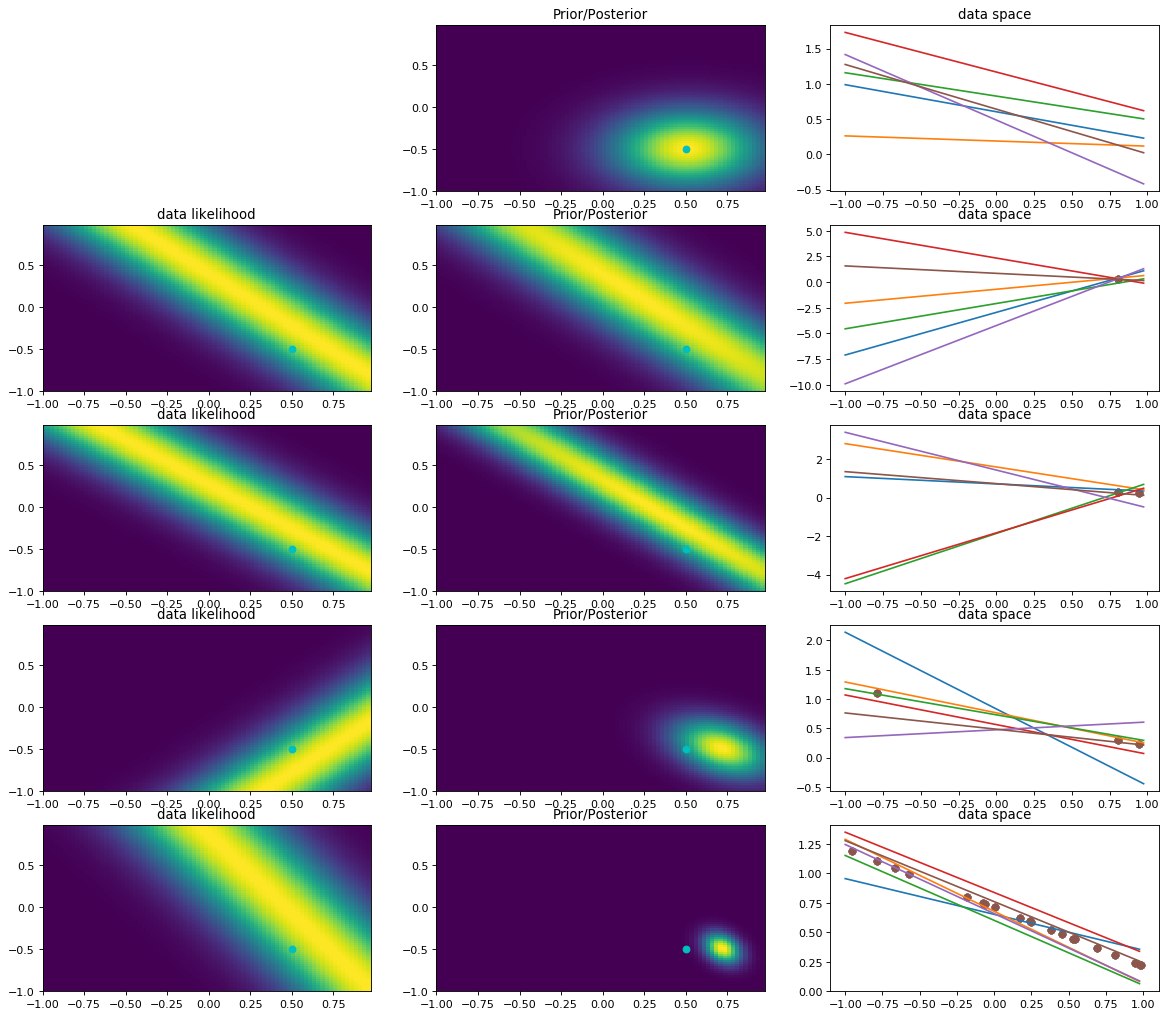

In [12]:
def likelihood_prior_func():   
    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    #set up variables
    a = 0.5
    b = -0.5
    rangeX = [-1, 1]
    step = 0.025
    X = np.mgrid[rangeX[0]:rangeX[1]:step]
    alpha = 10
    beta = 10
    S0 = (1/alpha)*np.eye(2)
    draw_num = (0,1,2,3,20)

    #initialize prior/posterior and sample data
    sigma = S0
    mean = [.5,-.5]
    draws = np.random.uniform(rangeX[0],rangeX[1],size=draw_num[-1])
    T = a + b*draws + np.random.normal(loc=0, scale=math.sqrt(1/beta))

    for i in range(len(draw_num)):
        if draw_num[i]>0: #skip first image
            #Show data likelihood
            Phi = np.vstack((np.ones(draws[0:draw_num[i]].shape), draws[0:draw_num[i]]))
            t = T[0:draw_num[i]]
            sigma = np.linalg.inv(S0 + beta*Phi@Phi.T)
            mean = beta*sigma@Phi@t

            w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
            p = multivariate_normal(t[draw_num[i]-1], 1/beta)
            out = np.empty(w0.shape)
            for j in range(len(w0)):
                out[j] = p.pdf(w0[j]+w1[j]*draws[draw_num[i]-1])

            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+1])
            ax.pcolor(w0, w1, out)
            ax.scatter(a,b, c='c')
            myTitle = 'data likelihood'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        #Show prior/posterior
        w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
        pos = np.empty(w1.shape + (2,))
        pos[:, :, 0] = w0; pos[:, :, 1] = w1
        p = multivariate_normal(mean, sigma)

        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+2])
        ax.pcolor(w0, w1, p.pdf(pos))
        ax.scatter(a,b, c='c')
        myTitle = 'Prior/Posterior'
        ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        #Show data space
        for j in range(6):
            w0, w1 = np.random.multivariate_normal(mean, sigma)
            t = w0 + w1*X
            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+3])
            ax.plot(X,t)
            if draw_num[i] > 0:
                ax.scatter(Phi[1,:], T[0:draw_num[i]])
            myTitle = 'data space'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

    plt.show()

likelihood_prior_func()

